In [1]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from sklearn import metrics
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import random
import nltk
import re

In [2]:
# import data
df = pd.read_csv('dara.csv')  

In [3]:
df = df.rename(columns={'0': 'title', '1': 'body', '2': 'tags'})

In [4]:
df

,Title,Body,Tags
0,efficient way to implement paging,<p>Should I use LINQ's <code>Skip()</code> and...,<sql><sql-server><asp.net-mvc><linq-to-sql><pa...
1,What does variable names beginning with _ mean?,<p>When writing my first asp.net MVC applicati...,<c#><asp.net><syntax><variables><naming-conven...
2,Is it valid to replace http:// with // in a <s...,<p>I have the following element:</p>\n\n<pre><...,<html><http><https><uri><protocol-relative>
3,Will new return NULL in any case?,<p>I know that according to C++ standard in ca...,<c++><visual-c++><memory-management><new-opera...
4,Convert float to string in positional format (...,<p>I want to print some floating point numbers...,<python><python-3.x><floating-point><number-fo...
...,...,...,...
17667,Cross-Origin-Opener-Policy policy would block ...,<p>I am using firebase and its google auth too...,<firebase><next.js><oauth-2.0><firebase-authen...
17668,VSC PowerShell. After npm updating packages .p...,<p>I design websites in VSC and PowerShell is ...,<firebase><powershell><vue.js><npm><visual-stu...
17669,How to force GCC to assume that a floating-poi...,<p>There are cases where you know that a certa...,<c++><gcc><assembly><floating-point><micro-opt...
17670,Jupyter command `jupyter-lab` not found,<p>I have tried to install jupyter lab on my K...,<python><python-3.x><jupyter-notebook><jupyter...


In [5]:
df['text'] = df['Title'].apply(lambda s: BeautifulSoup(s).text) + ' - ' + df['Body'].apply(lambda s: BeautifulSoup(s).text)

/home/marzime/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [6]:
df

,Title,Body,Tags,text
0,efficient way to implement paging,<p>Should I use LINQ's <code>Skip()</code> and...,<sql><sql-server><asp.net-mvc><linq-to-sql><pa...,efficient way to implement paging - Should I u...
1,What does variable names beginning with _ mean?,<p>When writing my first asp.net MVC applicati...,<c#><asp.net><syntax><variables><naming-conven...,What does variable names beginning with _ mean...
2,Is it valid to replace http:// with // in a <s...,<p>I have the following element:</p>\n\n<pre><...,<html><http><https><uri><protocol-relative>,Is it valid to replace http:// with // in a -...
3,Will new return NULL in any case?,<p>I know that according to C++ standard in ca...,<c++><visual-c++><memory-management><new-opera...,Will new return NULL in any case? - I know tha...
4,Convert float to string in positional format (...,<p>I want to print some floating point numbers...,<python><python-3.x><floating-point><number-fo...,Convert float to string in positional format (...
...,...,...,...,...
17667,Cross-Origin-Opener-Policy policy would block ...,<p>I am using firebase and its google auth too...,<firebase><next.js><oauth-2.0><firebase-authen...,Cross-Origin-Opener-Policy policy would block ...
17668,VSC PowerShell. After npm updating packages .p...,<p>I design websites in VSC and PowerShell is ...,<firebase><powershell><vue.js><npm><visual-stu...,VSC PowerShell. After npm updating packages .p...
17669,How to force GCC to assume that a floating-poi...,<p>There are cases where you know that a certa...,<c++><gcc><assembly><floating-point><micro-opt...,How to force GCC to assume that a floating-poi...
17670,Jupyter command `jupyter-lab` not found,<p>I have tried to install jupyter lab on my K...,<python><python-3.x><jupyter-notebook><jupyter...,Jupyter command `jupyter-lab` not found - I ha...


In [7]:
nltk.download('stopwords')
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer which is developed in recent years
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/marzime/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [9]:
i=0
str1=' '
final_string=[]
s=''
for sent in df['text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

In [10]:
df['clean_text']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review 
df['clean_text']=df['clean_text'].str.decode("utf-8")

In [11]:
df

,Title,Body,Tags,text,clean_text
0,efficient way to implement paging,<p>Should I use LINQ's <code>Skip()</code> and...,<sql><sql-server><asp.net-mvc><linq-to-sql><pa...,efficient way to implement paging - Should I u...,effici way implement page use linq skip take m...
1,What does variable names beginning with _ mean?,<p>When writing my first asp.net MVC applicati...,<c#><asp.net><syntax><variables><naming-conven...,What does variable names beginning with _ mean...,variabl name begin mean write first asp net mv...
2,Is it valid to replace http:// with // in a <s...,<p>I have the following element:</p>\n\n<pre><...,<html><http><https><uri><protocol-relative>,Is it valid to replace http:// with // in a -...,valid replac follow case site https site may a...
3,Will new return NULL in any case?,<p>I know that according to C++ standard in ca...,<c++><visual-c++><memory-management><new-opera...,Will new return NULL in any case? - I know tha...,new return null case know accord standard case...
4,Convert float to string in positional format (...,<p>I want to print some floating point numbers...,<python><python-3.x><floating-point><number-fo...,Convert float to string in positional format (...,convert float string posit format without scie...
...,...,...,...,...,...
17667,Cross-Origin-Opener-Policy policy would block ...,<p>I am using firebase and its google auth too...,<firebase><next.js><oauth-2.0><firebase-authen...,Cross-Origin-Opener-Policy policy would block ...,polici would block window close call error use...
17668,VSC PowerShell. After npm updating packages .p...,<p>I design websites in VSC and PowerShell is ...,<firebase><powershell><vue.js><npm><visual-stu...,VSC PowerShell. After npm updating packages .p...,vsc powershel npm updat packag cannot load run...
17669,How to force GCC to assume that a floating-poi...,<p>There are cases where you know that a certa...,<c++><gcc><assembly><floating-point><micro-opt...,How to force GCC to assume that a floating-poi...,forc gcc assum express case know certain expre...
17670,Jupyter command `jupyter-lab` not found,<p>I have tried to install jupyter lab on my K...,<python><python-3.x><jupyter-notebook><jupyter...,Jupyter command `jupyter-lab` not found - I ha...,jupyt command found tri instal jupyt lab kubun...


# Modeling

In [12]:
def model_info(model, vectorizer):
    labels = model.labels_
    silhouette_score = metrics.silhouette_score(vectorizer, labels, metric='euclidean')
    print(silhouette_score)

def cluster_info(data, label: str, text: str, vectorizer, model, cluster_nbr: int):
    
    data_goruped = data.groupby([label])[text].count()

    print("Top terms per cluster:")
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()

    for i in range(cluster_nbr):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :cluster_nbr]:
            print(' %s' % terms[ind], end='')
            print()

    plt.bar([x for x in range(cluster_nbr)], data.groupby([label])[text].count(), alpha = 0.4)
    plt.title('Cluster points')
    plt.xlabel("Cluster number")
    plt.ylabel("Number of points")
    plt.show()

#     for i in range(cluster_nbr):
#         print("A review of assigned to cluster ", i)
#         print("-" * 70)
#         print(data.iloc[data.groupby([label]).groups[i][0]][text])
#         print('\n')
#         print("_" * 70)
        
    return data_goruped

def silhouette(vectorized_data):
    for i in range(2,11):
        model = KMeans(n_clusters = i, init='k-means++',random_state=99)
        model.fit(vectorized_data)
        print(f"for {i} clusters")
        model_info(model, vectorized_data)

In [13]:
count_vect = CountVectorizer()

In [14]:
bow = count_vect.fit_transform(df['clean_text'].values)

In [15]:
# silhouette(bow)

In [16]:
model = KMeans(n_clusters = 10, init='k-means++',random_state=99)
model.fit(bow)

/home/marzime/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=99)

In [17]:
model_info(model, bow)

0.73523048725364


In [18]:
df['Bow Clus Label'] = model.labels_ # the last column you can see the label numebers
df

,Title,Body,Tags,text,clean_text,Bow Clus Label
0,efficient way to implement paging,<p>Should I use LINQ's <code>Skip()</code> and...,<sql><sql-server><asp.net-mvc><linq-to-sql><pa...,efficient way to implement paging - Should I u...,effici way implement page use linq skip take m...,0
1,What does variable names beginning with _ mean?,<p>When writing my first asp.net MVC applicati...,<c#><asp.net><syntax><variables><naming-conven...,What does variable names beginning with _ mean...,variabl name begin mean write first asp net mv...,0
2,Is it valid to replace http:// with // in a <s...,<p>I have the following element:</p>\n\n<pre><...,<html><http><https><uri><protocol-relative>,Is it valid to replace http:// with // in a -...,valid replac follow case site https site may a...,0
3,Will new return NULL in any case?,<p>I know that according to C++ standard in ca...,<c++><visual-c++><memory-management><new-opera...,Will new return NULL in any case? - I know tha...,new return null case know accord standard case...,0
4,Convert float to string in positional format (...,<p>I want to print some floating point numbers...,<python><python-3.x><floating-point><number-fo...,Convert float to string in positional format (...,convert float string posit format without scie...,0
...,...,...,...,...,...,...
17667,Cross-Origin-Opener-Policy policy would block ...,<p>I am using firebase and its google auth too...,<firebase><next.js><oauth-2.0><firebase-authen...,Cross-Origin-Opener-Policy policy would block ...,polici would block window close call error use...,0
17668,VSC PowerShell. After npm updating packages .p...,<p>I design websites in VSC and PowerShell is ...,<firebase><powershell><vue.js><npm><visual-stu...,VSC PowerShell. After npm updating packages .p...,vsc powershel npm updat packag cannot load run...,0
17669,How to force GCC to assume that a floating-poi...,<p>There are cases where you know that a certa...,<c++><gcc><assembly><floating-point><micro-opt...,How to force GCC to assume that a floating-poi...,forc gcc assum express case know certain expre...,0
17670,Jupyter command `jupyter-lab` not found,<p>I have tried to install jupyter lab on my K...,<python><python-3.x><jupyter-notebook><jupyter...,Jupyter command `jupyter-lab` not found - I ha...,jupyt command found tri instal jupyt lab kubun...,0


Top terms per cluster:
Cluster 0: use
 file
 get
 like
 tri
 work
 code
 new
 function
 return
Cluster 1: org
 gradl
 execut
 intern
 launcher
 api
 task
 daemon
 maven
 server
Cluster 2: org
 springframework
 apach
 bean
 java
 boot
 context
 com
 intern
 support
Cluster 3: sort
 took
 array
 collect
 ratio
 int
 system
 time
 long
 code
Cluster 4: error
 lib
 obj
 defin
 alreadi
 dll
 msvcrt
 libcmt
 dcmpsprt
 dcmprscu
Cluster 5: gem
 rail
 test
 dev
 blog
 user
 gangelo
 bundl
 vendor
 lib
Cluster 6: lib
 gem
 rubi
 local
 usr
 dylib
 librubi
 cellar
 sinatra
 base
Cluster 7: android
 com
 view
 app
 androidruntim
 java
 method
 public
 activitythread
 use
Cluster 8: gradl
 org
 intern
 execut
 api
 launcher
 provid
 tool
 exec
 server
Cluster 9: lxml
 build
 lib
 src
 copi
 includ
 html
 isoschematron
 xsl
 resourc


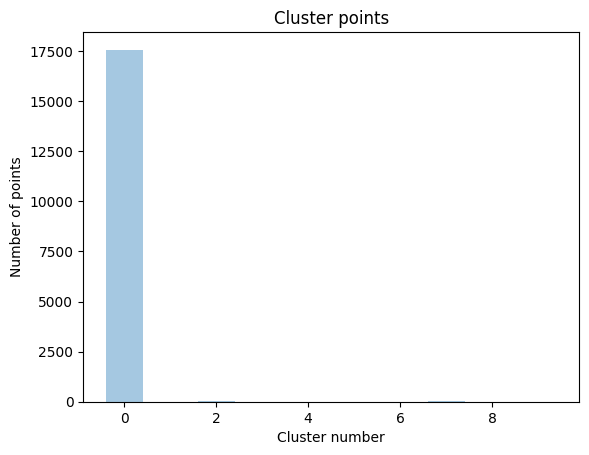

Bow Clus Label
0    17567
1        7
2       29
3        1
4        1
5        1
6        2
7       60
8        3
9        1
Name: clean_text, dtype: int64

In [19]:
cluster_info(df, 'Bow Clus Label', 'clean_text', count_vect, model, 10)

# TF-IDF

In [58]:
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(df['clean_text'].values)
tfidf

<17672x44518 sparse matrix of type '<class 'numpy.float64'>'
	with 768138 stored elements in Compressed Sparse Row format>

In [21]:
# silhouette(tfidf)

In [57]:
model_tf = KMeans(n_clusters = 10, init='k-means++',random_state=99)
model_tf.fit(tfidf)

KMeans(n_clusters=10, random_state=99)

In [47]:
model_tf.labels_

array([2, 9, 9, ..., 9, 4, 9], dtype=int32)

In [48]:
tfidf

<17672x44518 sparse matrix of type '<class 'numpy.float64'>'
	with 768138 stored elements in Compressed Sparse Row format>

In [25]:
model_info(model_tf, tfidf)

0.005771020602967553


In [26]:
df['Tfidf Clus Label'] = model_tf.labels_
df

,Title,Body,Tags,text,clean_text,Bow Clus Label,Tfidf Clus Label
0,efficient way to implement paging,<p>Should I use LINQ's <code>Skip()</code> and...,<sql><sql-server><asp.net-mvc><linq-to-sql><pa...,efficient way to implement paging - Should I u...,effici way implement page use linq skip take m...,0,2
1,What does variable names beginning with _ mean?,<p>When writing my first asp.net MVC applicati...,<c#><asp.net><syntax><variables><naming-conven...,What does variable names beginning with _ mean...,variabl name begin mean write first asp net mv...,0,9
2,Is it valid to replace http:// with // in a <s...,<p>I have the following element:</p>\n\n<pre><...,<html><http><https><uri><protocol-relative>,Is it valid to replace http:// with // in a -...,valid replac follow case site https site may a...,0,9
3,Will new return NULL in any case?,<p>I know that according to C++ standard in ca...,<c++><visual-c++><memory-management><new-opera...,Will new return NULL in any case? - I know tha...,new return null case know accord standard case...,0,9
4,Convert float to string in positional format (...,<p>I want to print some floating point numbers...,<python><python-3.x><floating-point><number-fo...,Convert float to string in positional format (...,convert float string posit format without scie...,0,1
...,...,...,...,...,...,...,...
17667,Cross-Origin-Opener-Policy policy would block ...,<p>I am using firebase and its google auth too...,<firebase><next.js><oauth-2.0><firebase-authen...,Cross-Origin-Opener-Policy policy would block ...,polici would block window close call error use...,0,9
17668,VSC PowerShell. After npm updating packages .p...,<p>I design websites in VSC and PowerShell is ...,<firebase><powershell><vue.js><npm><visual-stu...,VSC PowerShell. After npm updating packages .p...,vsc powershel npm updat packag cannot load run...,0,9
17669,How to force GCC to assume that a floating-poi...,<p>There are cases where you know that a certa...,<c++><gcc><assembly><floating-point><micro-opt...,How to force GCC to assume that a floating-poi...,forc gcc assum express case know certain expre...,0,9
17670,Jupyter command `jupyter-lab` not found,<p>I have tried to install jupyter lab on my K...,<python><python-3.x><jupyter-notebook><jupyter...,Jupyter command `jupyter-lab` not found - I ha...,jupyt command found tri instal jupyt lab kubun...,0,4


In [ ]:
df.to_csv('data.csv') 

Top terms per cluster:
Cluster 0: imag
 button
 text
 view
 color
 page
 use
 click
 css
 element
Cluster 1: string
 convert
 charact
 format
 use
 return
 valu
 like
 split
 way
Cluster 2: tabl
 column
 sql
 select
 datafram
 date
 databas
 queri
 row
 data
Cluster 3: android
 gradl
 com
 studio
 build
 app
 project
 googl
 apk
 use
Cluster 4: instal
 packag
 npm
 python
 usr
 pip
 version
 gem
 run
 command
Cluster 5: file
 line
 directori
 use
 project
 path
 folder
 command
 get
 tri
Cluster 6: array
 numpi
 object
 element
 function
 valu
 int
 use
 list
 loop
Cluster 7: class
 public
 int
 return
 method
 object
 static
 void
 type
 privat
Cluster 8: request
 server
 http
 web
 api
 net
 use
 json
 post
 respons
Cluster 9: use
 differ
 code
 function
 like
 get
 run
 way
 would
 test


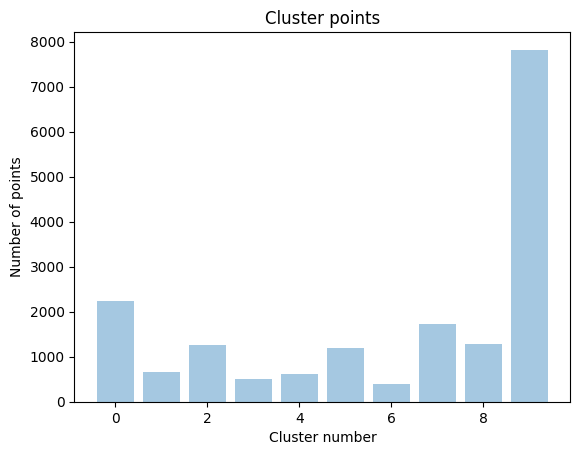

Tfidf Clus Label
0    2228
1     670
2    1261
3     503
4     613
5    1191
6     387
7    1719
8    1279
9    7821
Name: clean_text, dtype: int64

In [27]:
cluster_info(df, 'Tfidf Clus Label', 'clean_text', tfidf_vect, model_tf, 10)

In [28]:
text = 'Why is processing a sorted array faster than processing an unsorted array? - In this C++ code, sorting the data (before the timed region) makes the primary loop ~6x faster:'

In [34]:
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

def stem(text: str):
    str1=' '
    final_string=[]
    s=''

    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(text) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")

    final_string.append(str1)

    final_string = tfidf_vect.fit_transform(final_string)

    return final_string

In [49]:
processed_text = stem(text)

In [50]:
processed_text

<1x12 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [54]:
model_tf.predict(processed_text)

array([9], dtype=int32)

In [ ]:
# pickle.dump(model, open('model.pkl', 'wb'))